<a href="https://colab.research.google.com/github/valeria-edulabs/ai-experts/blob/main/meeting15/health-insurance-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and configurations

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# plot figure size configuration
# plt.rcParams['figure.figsize'] = [25, 5]
sns.set_palette('muted')

In [ ]:
data_path = "https://storage.googleapis.com/biosense-ml-data/insurance.csv"

# Read data into Pandas Dataframe

In [ ]:
df = pd.read_csv(data_path)

# Exploratory Data Analysis (EDA) for a Health Insurance Dataset

## **Initial data review - simple sanity check**



In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

## **Understanding the Variables**

* **Numerical Variables:**
  * Examine the distribution of numerical variables like age, BMI, number of dependents, and charges.
  * Use histograms, box plots, or density plots to understand the central tendency, spread, and skewness of the data.
* **Categorical Variables:**
  * Analyze the distribution of categorical variables like gender, age group, region, and occupation.
  * Use bar charts or pie charts to visualize the frequencies of different categories.


In [ ]:
df.columns

#### Age

In [ ]:
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

In [ ]:
# Step 1: Aggregate the data by age and sex
population_df = df.groupby(['age', 'sex']).size().reset_index(name='count')

# Step 2: Pivot the data to have separate columns for Males and Females
population_pivot = population_df.pivot(index='age', columns='sex', values='count').fillna(0)

# Step 3: Make the male counts negative
population_pivot['male'] = -population_pivot['male']

# Step 4: Plot the population pyramid
plt.figure(figsize=(10, 8))

# Plotting males
sns.barplot(x=population_pivot['male'], y=population_pivot.index, label='Males', orient='y', color='#4A90F4')

# Plotting females
sns.barplot(x=population_pivot['female'], y=population_pivot.index, label='Females', orient='y', color='#DA64AB')

# Add labels and title
plt.xlabel('Population')
plt.ylabel('Age')
plt.title('Population Pyramid')
plt.legend()

# Invert y-axis so that the oldest age group is at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

In [ ]:
# Get quantiles
quantiles = df['age'].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
quantiles

In [ ]:
# get age bins

# Define bin edges
bins = [0, 18, 45, 65, 100]

# Create a new column with the categorized age
df['age_category'] = pd.cut(df['age'], bins=bins, labels=['Under 18', '18-44', '45-65', '65+'])


In [ ]:
df['age_category'].value_counts(normalize=True).sort_index()

#### Categories

In [ ]:
df.info()

In [ ]:
df.sex.unique()

In [ ]:
df.region.unique()

In [ ]:
df['sex'] = df['sex'].astype('category')

In [ ]:
df['region'] = df['region'].astype('category')
df['smoker'] = df['smoker'].apply(lambda text: True if text == 'yes' else False)

### Note on huge datasets and how to handle them

In [ ]:
df['age'] = df['age'].astype(np.int8)

In [ ]:
df['children'] = df['children'].astype(np.int8)

In [ ]:
df['charges'] = df['charges'].astype(np.float16)

In [ ]:
df['bmi'] = df['bmi'].astype(np.float16)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.906250,0,True,southwest,16880.0
1,18,male,33.781250,1,False,southeast,1726.0
2,28,male,33.000000,3,False,southeast,4448.0
3,33,male,22.703125,0,False,northwest,21984.0
4,32,male,28.875000,0,False,northwest,3866.0
...,...,...,...,...,...,...,...
1337,50,male,30.968750,3,False,northwest,10600.0
1338,18,female,31.921875,0,False,northeast,2206.0
1339,18,female,36.843750,0,False,southeast,1630.0
1340,21,female,25.796875,0,False,southwest,2008.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1339 entries, 0 to 1341
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1339 non-null   int8    
 1   sex       1339 non-null   category
 2   bmi       1339 non-null   float16 
 3   children  1339 non-null   int8    
 4   smoker    1339 non-null   bool    
 5   region    1339 non-null   category
 6   charges   1339 non-null   float16 
dtypes: bool(1), category(2), float16(2), int8(2)
memory usage: 22.5 KB


#### Smoker

In [ ]:
sns.countplot(x='smoker', data=df)
plt.title('Count of Smoker')
plt.show()

#### Region

In [ ]:
sns.countplot(x='region', data=df)
plt.title('Count of Region')
plt.show()

## **Identifying Relationships**

* **Correlation:**
  * Calculate the correlation between different variables to identify potential relationships.
  * Use a correlation matrix or heatmap to visualize the correlations.
* **Scatter Plots:**
  * Create scatter plots to visualize the relationship between pairs of variables, especially for numerical variables.

In [ ]:
# Relationship between numerical variables
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs. Charges')
plt.show()

In [ ]:
g = sns.FacetGrid(df, col='age_category')

# Plot a scatter plot for each category
g.map(sns.scatterplot, 'bmi', 'charges')

In [ ]:
g = sns.FacetGrid(df, col='smoker')

# Plot a scatter plot for each category
g.map(sns.scatterplot, 'bmi', 'charges')

In [ ]:
sns.scatterplot(x='age', y='bmi', data=df)
plt.title('Age vs. BMI')
plt.show()

### Spearman vs. Pearson Correlation

**Spearman correlation** and **Pearson correlation** are both statistical measures used to quantify the strength and direction of the linear relationship between two variables. However, they differ in their assumptions and applicability.

### Pearson Correlation
* **Assumptions:**
  * Both variables are normally distributed.
  * The relationship between the variables is linear.
* **Calculation:** Measures the covariance between the standardized variables.
* **Interpretation:** A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

### Spearman Correlation
* **Assumptions:**
  * The variables are ordinal or continuous.
  * The relationship between the variables is monotonic (either increasing or decreasing).
* **Calculation:** Measures the correlation between the ranks of the variables.
* **Interpretation:** Similar to Pearson correlation, with values ranging from -1 to 1.

**When to Use Which:**

* **Pearson correlation:** Use when both variables are normally distributed and the relationship is linear.
* **Spearman correlation:** Use when the variables are ordinal or continuous, or when the relationship is non-linear but monotonic.

**Key Differences:**

| Feature | Pearson Correlation | Spearman Correlation |
|---|---|---|
| Assumptions | Normality, linearity | Ordinal or continuous, monotonic |
| Calculation | Covariance of standardized variables | Correlation of ranks |
| Sensitivity to outliers | Sensitive to outliers | Less sensitive to outliers |

In summary, Pearson correlation is suitable for linear relationships between normally distributed variables, while Spearman correlation is more robust to outliers and can handle non-linear monotonic relationships.


In [ ]:
# Correlation matrix
correlation_matrix = df.select_dtypes(include=['number', 'bool']).corr()

In [ ]:
# viridis: A perceptually uniform sequential colormap that ranges from dark blue to yellow.
# inferno: A perceptually uniform sequential colormap that ranges from dark red to yellow.
# magma: A perceptually uniform sequential colormap that ranges from dark gray to yellow.
# plasma: A perceptually uniform sequential colormap that ranges from dark purple to yellow.
# cividis: A perceptually uniform sequential colormap that ranges from dark blue to yellow.
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix = df.select_dtypes(include='number').corr('spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix')
plt.show()

#### Contingency table - for categorical variables

In [ ]:
# Create contingency table
pd.crosstab(df['region'], df['smoker'])

## **Handling Missing Values**

* **Identify Missing Data:**
  * Check for missing values in the dataset using functions like `isnull()` or `isna()`.
* **Impute or Remove:**
  * Decide whether to impute missing values with appropriate methods (e.g., mean, median, mode) or remove rows or columns with excessive missing data.

In [ ]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# Get rows with null values
null_rows = df[df.isnull().any(axis=1)]
null_rows

,age,sex,bmi,children,smoker,region,charges
542,33,female,NaN,3,False,southwest,6257.0
583,58,male,25.3,1,False,NaN,12870.1


In [ ]:
df.dropna(subset=['bmi'], inplace=True)

In [ ]:
df.groupby('region')['charges'].agg(['mean', 'std', 'count'])

<ipython-input-16-a7a603201214>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('region')['charges'].agg(['mean', 'std', 'count'])


,mean,std,count
region,,,
northeast,13373.507397,11254.037883,325
northwest,12417.575374,11072.276928,325
southeast,14735.411438,13971.098589,364
southwest,12383.909962,11558.678211,326


In [ ]:
df.fillna({'region': 'southwest'}, inplace=True)

## **Handling Duplications**

* **Identify Duplicates:**
  * Check for duplicate values in the dataset using function `duplicated()`.
* **Remove:**
  * Remove duplicated rows using `drop_duplicates()` method.

In [ ]:
df.duplicated().sum()

2

In [ ]:
duplicate_rows = df[df.duplicated(keep='last')]
duplicate_rows

,age,sex,bmi,children,smoker,region,charges
10,25,male,26.22,0,False,northeast,2721.3208
196,19,male,30.59,0,False,northwest,1639.5631


In [ ]:
df = df.drop_duplicates()

In [ ]:
# are there people with same data, but different charges?
df.duplicated(subset=df.columns.drop('charges')).sum()


2

In [ ]:
df[df.duplicated(subset=df.columns.drop('charges'), keep=False)]

,age,sex,bmi,children,smoker,region,charges
103,18,female,30.115,0,False,northeast,21344.84670
182,18,female,38.280,0,False,southeast,1631.82120
355,18,female,38.280,0,False,southeast,14133.03775
472,18,female,30.115,0,False,northeast,2203.47185


<Axes: xlabel='bmi', ylabel='charges'>

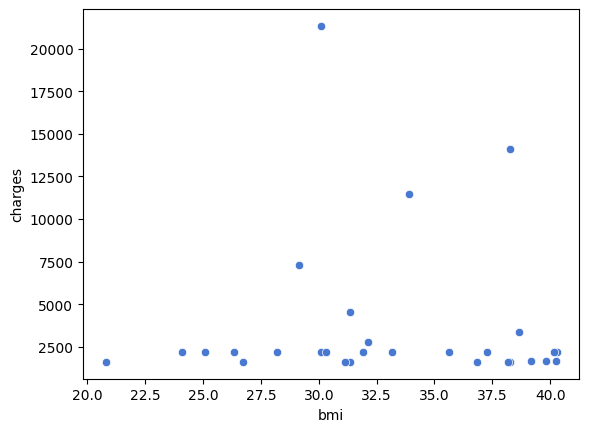

In [ ]:
sns.scatterplot(df[(df['age'] == 18) & (df['smoker'] == False) & (df['sex'] == 'female')], x='bmi', y='charges')

In [ ]:
df[(df['age'] == 18) & (df['smoker'] == False) & (df['sex'] == 'female')].sort_values('charges')

,age,sex,bmi,children,smoker,region,charges
360,18,female,20.790,0,False,southeast,1607.510100
237,18,female,26.730,0,False,southeast,1615.766700
826,18,female,31.130,0,False,southeast,1621.882700
483,18,female,31.350,0,False,southeast,1622.188500
1339,18,female,36.850,0,False,southeast,1629.833500
400,18,female,38.170,0,False,southeast,1631.668300
182,18,female,38.280,0,False,southeast,1631.821200
603,18,female,39.160,0,False,southeast,1633.044400
1252,18,female,39.820,0,False,southeast,1633.961800
902,18,female,40.260,0,False,southeast,1634.573400


## **Outlier Detection**

* **Identify Outliers:**
  * Use box plots, scatter plots, or statistical methods like Z-scores or IQR to detect outliers.
* **Handle Outliers:**
  * Decide whether to remove outliers or treat them differently based on the context and the impact they might have on the analysis.

**Handling outliers is crucial before running machine learning models for several reasons:**

1. **Improved Model Performance:** Outliers can significantly skew the training process, leading to models that are biased towards extreme values. This can reduce the model's accuracy and predictive power. By handling outliers, you can ensure that your model learns from representative data.

2. **Reduced Bias:** Outliers can introduce bias into your model, making it more likely to predict extreme values even when they are not representative of the overall data. This can lead to inaccurate predictions and unreliable results.

3. **Increased Robustness:** Outliers can make your model more sensitive to noise and fluctuations in the data. By handling outliers, you can make your model more robust and less susceptible to overfitting.

4. **Better Interpretability:** Outliers can make it difficult to interpret the results of your model. By removing or handling outliers, you can improve the interpretability of your model and gain a better understanding of its predictions.

**Common Approaches to Handling Outliers:**

* **Removal:** If outliers are clearly erroneous or have a significant impact on the model, they can be removed. However, be cautious about removing too many data points, as this can lead to data loss.
* **Capping:** Extreme values can be replaced with a maximum or minimum threshold.
* **Transformation:** Transformations like log or square root can help normalize the distribution of the data and reduce the impact of outliers.


In [ ]:
df.columns

#### IQR (Interquartile Range)

In [ ]:
# Calculate IQR
feature = 'charges'
# feature = 'bmi'

Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

print(f"IQR: {IQR} | Lower bound: {lower_bound} | Upper Bound: {upper_bound}")
print("Outliers based on IQR:")
outliers_iqr

IQR: 11970.312300000001 | Lower bound: -13208.77 | Upper Bound: 34672.4792
Outliers based on IQR:


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,True,southeast,39611.75770
19,30,male,35.300,0,True,southwest,36837.46700
23,34,female,31.920,1,True,northeast,37701.87680
30,31,male,36.300,2,True,southwest,38711.00000
31,22,male,35.600,0,True,southwest,35585.57600
...,...,...,...,...,...,...,...
1304,45,male,30.360,0,True,southeast,62592.87309
1305,62,male,30.875,3,True,northwest,46718.16325
1307,43,male,27.800,0,True,southwest,37829.72420
1317,19,female,34.700,2,True,southwest,36397.57600


In [ ]:
import numpy as np

# Group the data by 'smoker' and 'sex'
grouped_data = df.groupby(['smoker', 'sex'])

# Calculate Z-scores within each group
def calculate_z_scores(group):
    z_scores = (group['charges'] - group['charges'].mean()) / group['charges'].std()
    return z_scores

z_scores = grouped_data.apply(calculate_z_scores)
z_scores = z_scores.reset_index()
z_scores = z_scores.set_index('level_2')
np.abs(z_scores['charges']) > 3


# Identify outliers based on Z-scores (e.g., Z-score > 3 or < -3)
outliers = df[z_scores['charges'].abs() > 3]

print("Outliers:")
outliers

Outliers:


<ipython-input-64-feac5a8447e7>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['smoker', 'sex'])
<ipython-input-64-feac5a8447e7>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[z_scores['charges'].abs() > 3]


,age,sex,bmi,children,smoker,region,charges
9,60,female,25.840,0,False,northwest,28923.13692
63,64,male,24.700,1,False,northwest,30166.61817
116,60,male,28.595,0,False,northeast,30259.99556
139,54,female,31.900,3,False,southeast,27322.73386
141,34,male,22.420,2,False,northeast,27375.90478
243,55,female,26.800,1,False,southwest,35160.13457
290,52,male,26.400,3,False,southeast,25992.82104
380,62,male,31.460,1,False,southeast,27000.98473
388,50,male,25.365,2,False,northwest,30284.64294
444,59,female,36.520,1,False,southeast,28287.89766


#### Z-score

In [ ]:
# Calculate Z-scores

# feature = 'charges'
feature = 'bmi'

z_scores = (df[feature] - df[feature].mean()) / df[feature].std()

# Identify outliers based on a threshold (e.g., Z-score > 3 or < -3)
outliers_z_score = df[z_scores.abs() > 3]
print("Outliers based on Z-scores:")
outliers_z_score

In [ ]:
sns.displot(df['charges'])

In [ ]:
# Box plots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'bmi', 'children', 'charges']])
plt.title('Box Plots for Numerical Variables')
plt.show()

In [ ]:
# Box plots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['age', 'bmi', 'children']])
plt.title('Box Plots for Numerical Variables')
plt.show()

In [ ]:
# Box plots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['charges'])
plt.title('Box Plots for Numerical Variables')
plt.show()

In [ ]:
# Scatter plot to visualize the relationship between BMI and charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Scatter Plot of BMI vs. Charges')
plt.show()

## **Group Analysis**

* **Analyze by Category:**
  * Group the data by categorical variables (e.g., gender, region) and compare the distributions of numerical variables within each group.

**Understanding Group Analysis**

Group analysis is a valuable technique in data analysis and machine learning for several reasons:

1. **Identifying Patterns within Groups:** By grouping data based on categorical variables, you can uncover patterns or trends that may not be apparent when examining the entire dataset. This can help you understand how different groups differ in terms of their characteristics and behaviors.

2. **Comparing Group Characteristics:** Group analysis allows you to compare the distributions of numerical variables across different groups. This can help you identify significant differences or similarities between groups, which can be informative for further analysis or decision-making.

3. **Understanding the Impact of Categorical Variables:** Group analysis can help you understand how categorical variables influence other variables in your dataset. For example, you might discover that a particular region has a higher average income or that a certain gender group is more likely to engage in a specific behavior.

4. **Developing Targeted Strategies:** If you are working on a business problem, group analysis can help you develop targeted strategies for different segments of your customer base. By understanding the unique characteristics of each group, you can tailor your marketing efforts, product offerings, or services to meet their specific needs.

5. **Improving Model Performance:** In machine learning, group analysis can be used to identify potential biases in your data or to develop more accurate models. By understanding how different groups differ in terms of their characteristics, you can ensure that your model is not unfairly biased towards or against certain groups.

**In summary, group analysis is a powerful tool for understanding the relationships between categorical and numerical variables in your data. By grouping your data and comparing the distributions of variables within each group, you can gain valuable insights that can inform your analysis, decision-making, and model development.**


In [ ]:
# Group the data by a categorical variable (e.g., 'gender')
feature = 'sex'
feature = 'smoker'
grouped_data = df.groupby(feature)

# Compare distributions of numerical variables within each group
for column in ['age', 'bmi', 'children', 'charges']:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(x=feature, y=column, data=df, ax=ax)
    plt.title(f'Box Plot of {column} by {feature.capitalize()}')
    plt.show()

## **Save clean data**



Save with outliers

In [ ]:
df.to_csv('insurance_clean.csv', index=False)

Save without outliers

In [ ]:
# Create a boolean mask for non-outlier rows
non_outlier_mask = ~df.isin(outliers_iqr).any(axis=1)

# Filter the DataFrame to keep only non-outlier rows
df_cleaned = df[non_outlier_mask]

In [ ]:
df_cleaned.shape

(1202, 7)

In [ ]:
df_cleaned.to_csv('insurance_clean_no_outliers.csv', index=False)